<a href="https://colab.research.google.com/github/rajasekaran12345/onemadAI/blob/main/housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#converting csv file to dataframe
data=pd.read_csv("https://raw.githubusercontent.com/connectaditya/House-price-prediction/master/USA_Housing.csv")

In [ ]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
#deleting the address column
del data['Address']

In [ ]:
data.describe()
#the diffrence between 75% values and max values is higher in the columns Avg. Area Income,Area Population,Price.it has a higher possiblity of outliers.

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
#removing outliers using percentile
max_threshold_a=data['Avg. Area Income'].quantile(0.95)
max_threshold_b=data['Area Population'].quantile(0.95)
max_threshold_c=data['Price'].quantile(0.95)
min_threshold_a=data['Avg. Area Income'].quantile(0.05)
min_threshold_b=data['Area Population'].quantile(0.05)
min_threshold_c=data['Price'].quantile(0.05)

In [ ]:
data1=data[(data['Avg. Area Income']<max_threshold_a) & (data['Avg. Area Income']>min_threshold_a) & (data['Area Population']<max_threshold_b) & (data['Area Population']>min_threshold_b) & (data['Price']<max_threshold_c) & (data['Price']>min_threshold_c)]

In [ ]:
data1.shape

(3800, 6)

In [ ]:
data1.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3800 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              3800 non-null   float64
 1   Avg. Area House Age           3800 non-null   float64
 2   Avg. Area Number of Rooms     3800 non-null   float64
 3   Avg. Area Number of Bedrooms  3800 non-null   float64
 4   Area Population               3800 non-null   float64
 5   Price                         3800 non-null   float64
dtypes: float64(6)
memory usage: 207.8 KB


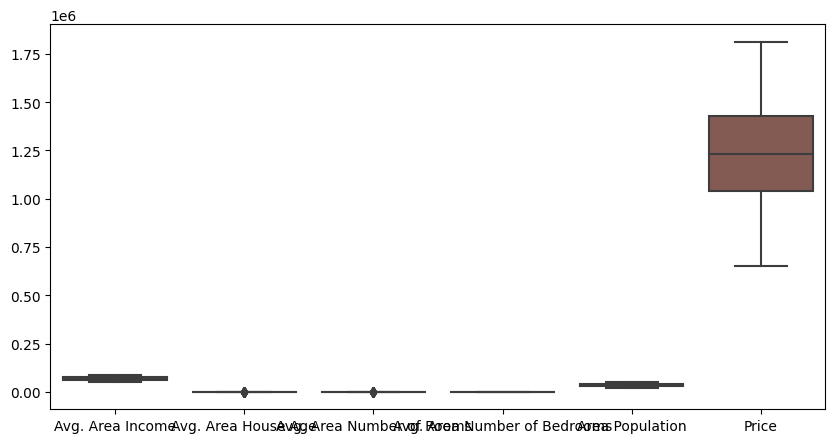

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.boxplot(data=data1)
plt.show()

In [ ]:
#importing standard scaler,since we are going use distance based model we have to scale our data
from sklearn.preprocessing import StandardScaler

In [ ]:
#initializing standardscaler
ss=StandardScaler()
data_s=ss.fit_transform(data1)

In [ ]:
data_df=pd.DataFrame(data_s,columns=data1.columns)

In [ ]:
data_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.331158,-0.314493,0.026820,0.082972,-1.676655,-0.655944
1,1.294863,0.019086,-0.259527,-0.726635,0.535129,1.027369
2,-0.901452,-0.123721,1.573462,0.924963,0.109127,-0.656116
3,-0.649781,1.254573,-1.436417,-0.589002,-0.223803,0.103421
4,1.408229,-1.038328,-0.903790,0.042492,-1.202665,-0.621647


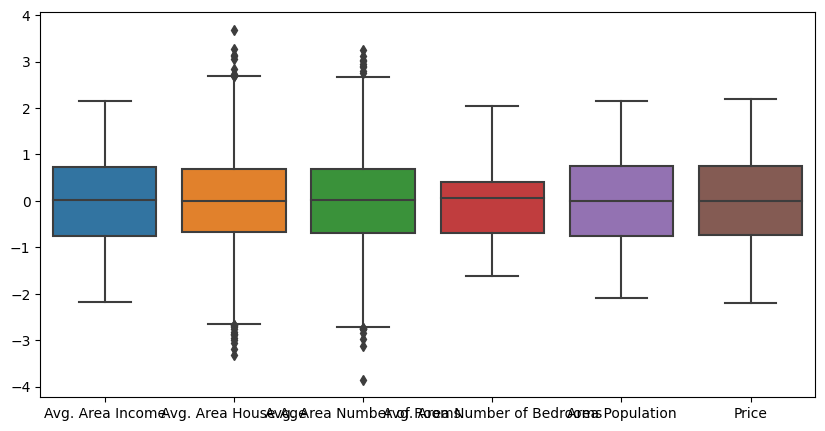

In [ ]:
#visualizing the scaled data withboxplot
fig=plt.figure(figsize=(10,5))
sns.boxplot(data=data_df)
plt.show()

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              3800 non-null   float64
 1   Avg. Area House Age           3800 non-null   float64
 2   Avg. Area Number of Rooms     3800 non-null   float64
 3   Avg. Area Number of Bedrooms  3800 non-null   float64
 4   Area Population               3800 non-null   float64
 5   Price                         3800 non-null   float64
dtypes: float64(6)
memory usage: 178.2 KB


In [ ]:
#importing train_test_split,and linear_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x=data_df.drop('Price',axis=1)

In [ ]:
#seperating train data and test data
x_train,x_test,y_train,y_test=train_test_split(x,data_df.Price,test_size=0.2)

In [ ]:
x_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1027,-0.069455,-0.646628,0.534743,-0.718539,1.102669
2241,0.879410,0.327405,0.173188,0.374431,-1.191906
3572,0.769594,-0.877021,-1.341026,-0.775212,1.855597
2456,-0.760070,-0.101642,1.785565,1.734570,0.134566
3313,0.828589,-0.412052,-0.095634,-0.427081,-1.734818


In [ ]:
#initializing linear_regression model,training our model.
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#finding the accuracy of our model
model.score(x_test,y_test)

0.8621359896849929

In [ ]:
#importing mean squared error from sklearn.metrics
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
#finding the error percentage of our model
rmse=mean_squared_error(y_test,y_pred,squared=False)

In [ ]:
rmse

0.37536727223569194

In [ ]:
#slope coefficients of our model
model.coef_

array([0.63752984, 0.5735305 , 0.42851252, 0.00573818, 0.41698642])

In [ ]:
#intercept value of our model
model.intercept_

7.404756729889866e-05

In [36]:
#manualy predicting the house price
manual_prediction=model.predict([[59643,10,4,2,34000]])
manual_prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52209.19182333])